In [14]:
from matplotlib import pyplot as plt
from whar_datasets import (
    get_dataset_cfg,
    WHARDatasetID,
    PostProcessingPipeline,
    PreProcessingPipeline,
    Loader,
    LOSOSplitter,
    KFoldSplitter,
    LGSOSplitter,
)

In [15]:
cfg = get_dataset_cfg(WHARDatasetID.WISDM)

cfg.parallelize = True
cfg.in_memory = True
force_recompute = False
# force_recompute = [False, True, True]

In [16]:
pre_pipeline = PreProcessingPipeline(cfg)
activity_df, session_df, window_df = pre_pipeline.run(force_recompute)

2026-01-04 17:48:28,256 - whar-datasets - INFO - Running DownloadingStep
2026-01-04 17:48:28,258 - whar-datasets - INFO - Checking hash for DownloadingStep
2026-01-04 17:48:28,261 - whar-datasets - INFO - Hash is up to date
2026-01-04 17:48:28,262 - whar-datasets - INFO - Running ParsingStep
2026-01-04 17:48:28,262 - whar-datasets - INFO - Checking hash for ParsingStep
2026-01-04 17:48:28,264 - whar-datasets - INFO - Hash is up to date
2026-01-04 17:48:28,265 - whar-datasets - INFO - Running WindowingStep
2026-01-04 17:48:28,266 - whar-datasets - INFO - Checking hash for WindowingStep
2026-01-04 17:48:28,269 - whar-datasets - INFO - Hash is up to date
2026-01-04 17:48:28,270 - whar-datasets - INFO - Loading windowing
2026-01-04 17:48:28,288 - whar-datasets - INFO - activity_ids from 0 to 5
2026-01-04 17:48:28,289 - whar-datasets - INFO - subject_ids from 0 to 35


In [17]:
splitter = LOSOSplitter(cfg)
# splitter = LGSOSplitter(cfg)
# splitter = KFoldSplitter(cfg)

splits = splitter.get_splits(session_df, window_df)
for split in splits:
    print(
        split.identifier,
        len(split.train_indices),
        len(split.val_indices),
        len(split.test_indices),
    )

subject_0 17256 4313 839
subject_1 17479 4369 560
subject_2 17041 4260 1107
subject_3 17336 4333 739
subject_4 17347 4336 725
subject_5 17508 4377 523
subject_6 17476 4368 564
subject_7 17388 4347 673
subject_8 17407 4351 650
subject_9 17410 4352 646
subject_10 17355 4338 715
subject_11 17576 4394 438
subject_12 17280 4319 809
subject_13 17564 4390 454
subject_14 17453 4363 592
subject_15 17384 4345 679
subject_16 17560 4390 458
subject_17 17420 4355 633
subject_18 17276 4319 813
subject_19 17532 4383 493
subject_20 17422 4355 631
subject_21 17384 4346 678
subject_22 17742 4435 231
subject_23 17532 4383 493
subject_24 17369 4342 697
subject_25 17283 4320 805
subject_26 17232 4308 868
subject_27 17376 4344 688
subject_28 17381 4345 682
subject_29 17565 4391 452
subject_30 17460 4365 583
subject_31 17723 4430 255
subject_32 17714 4428 266
subject_33 17555 4388 465
subject_34 17431 4357 620
subject_35 17220 4304 884


In [18]:
post_pipeline = PostProcessingPipeline(
    cfg, pre_pipeline, window_df, splits[0].train_indices
)
samples = post_pipeline.run(force_recompute)

2026-01-04 17:48:28,446 - whar-datasets - INFO - Running SamplingStep
2026-01-04 17:48:28,446 - whar-datasets - INFO - Checking hash for SamplingStep
2026-01-04 17:48:28,448 - whar-datasets - INFO - Hash is not up to date
Loading windows: 100%|██████████| 22408/22408 [00:08<00:00, 2599.45it/s]
2026-01-04 17:48:37,070 - whar-datasets - INFO - Computing samples
2026-01-04 17:48:37,070 - whar-datasets - INFO - Getting normalization parameters
2026-01-04 17:48:37,351 - whar-datasets - INFO - Normalizing and transforming windows
Normalizing and transforming windows: 100%|██████████| 22408/22408 [00:12<00:00, 1854.59it/s]
2026-01-04 17:48:49,435 - whar-datasets - INFO - Saving samples
Caching samples: 100%|██████████| 22408/22408 [00:02<00:00, 10377.46it/s]
2026-01-04 17:48:53,636 - whar-datasets - INFO - Loading samples
Loading samples: 100%|██████████| 22408/22408 [00:01<00:00, 11802.20it/s]


In [19]:
loader = Loader(session_df, window_df, post_pipeline.samples_dir, samples)

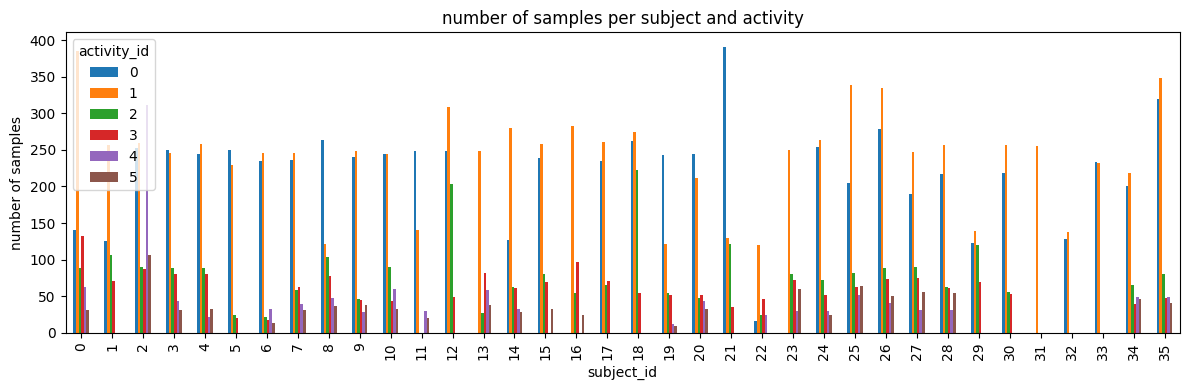

In [20]:
len(loader)
loader.plot_indices_statistics(list(range(len(loader))))

Text(0.5, 1.0, ' Activity: 3, Subject: 2')

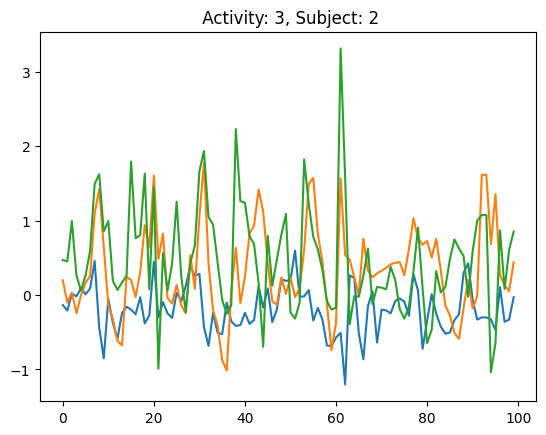

In [21]:
subject_id = 2
activity_id = 3

# index as ra
batch = loader.sample_triples(1, activity_id=activity_id, subject_id=subject_id)
ya, ys, (x,) = batch[0]

plt.plot(x)
plt.title(f" Activity: {ya}, Subject: {ys}")